In [2]:
# import tensorflow & keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 확인

In [3]:
#Download mnist data from MNIST server
img_rows = 28
img_cols = 28
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

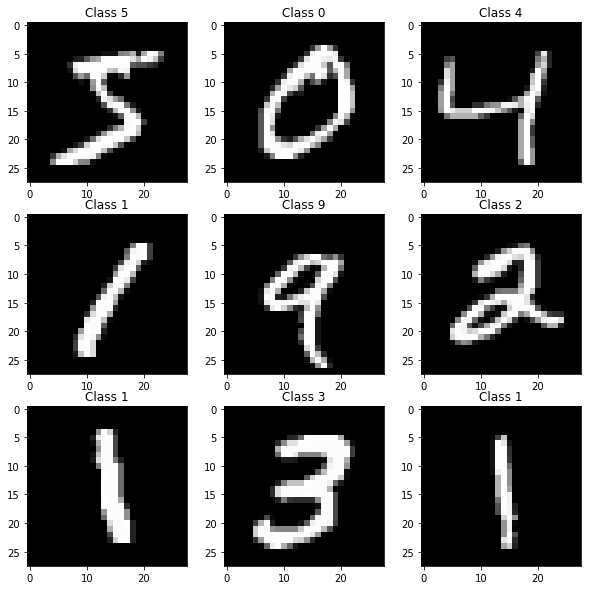

In [4]:
# Visualize images of the MNIST dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
# check the shape of training data
print(x_train.shape)
# check the shape of test data
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# 2. 데이터 전처리

In [6]:
# flatten training and test datasets to 1-d      -> 2차원 배열(28,28)을 784개의 속성 1차원으로 변환
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# 정규화(normalization) : 분산의 정도를 바꿔준다. 현재 0~255 사이의 값들을 0~1 사이의 값들로 변환
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [7]:
print(x_train[0].shape)
print(x_test[0].shape)

(784,)
(784,)


In [8]:
# observe the shapes of training data after the reshape
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


- train 데이터는 60000개 행, 784개의 속성
- test 데이터는 10000개의 행, 784개의 속성

### Y-레이블 값들을 원핫인코딩 : to_categorical 메소드 사용

In [9]:
# 1,2,3,... 10 :One Hot coding
num_classes = 10  # 결과 카테고리 갯수 = 10개의 숫자
from keras.utils import np_utils

# reshape labels categorically
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
print(y_train[0])
print(y_test[0])
y_train.shape,y_test.shape
print(x_train.shape[1])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
784


### -> 데이터 전처리 완료. 이제부터 딥러닝 학습~~

# 3. 딥러닝 모델 학습

In [11]:
x_train.shape[1]

784

In [12]:
def make_model(num_layers):   # num_layers : 은닉층 갯수
    model= Sequential()
    
    # 입력층
    # 인풋은 784개 속성. 은닉층이 없을 때는 바로 출력층으로. 클래스는 10개. 출력층 활성화함수는 다중분류이므로 softmax
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = 784, activation='softmax'))        
        # 컴파일
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    # 은닉층
    for i in range(num_layers):        
        if i == 0:
            model.add(Dense(output_dim = 32, input_dim = 784, activation='sigmoid'))        
        else:
            model.add(Dense(output_dim = 10, activation='sigmoid'))
    
    # 출력층 : 10차원, 다중분류이므로 활성화함수는 softmax
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    
    # 컴파일
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model

In [13]:
(x_train.shape[1],)
#num_hidden_neurons = 32
model = make_model(num_layers=1)

model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))

C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=32)`
  from ipykernel import kernelapp as app
C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0943 - accuracy: 0.0978 - val_loss: 0.0933 - val_accuracy: 0.0999
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0927 - accuracy: 0.1027 - val_loss: 0.0921 - val_accuracy: 0.1103
Epoch 3/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0917 - accuracy: 0.1172 - val_loss: 0.0913 - val_accuracy: 0.1265
Epoch 4/5
60000/60000 [

In [14]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09012828283309937
Test accuracy: 0.15770000219345093


In [19]:
history.history

{'val_loss': [0.09332802146673203,
  0.09209733335971833,
  0.09126315305233001,
  0.09063471426963807,
  0.09012828190326691],
 'val_accuracy': [0.09989999979734421,
  0.11029999703168869,
  0.1264999955892563,
  0.1387999951839447,
  0.15770000219345093],
 'loss': [0.0942643579920133,
  0.09265401576360066,
  0.09165492701133092,
  0.09094332143863042,
  0.09039076357285182],
 'accuracy': [0.0978, 0.10271667, 0.11716667, 0.1297, 0.14281666]}

10000/10000 [==============================] - 0s 19us/step

 Test Accuracy: 0.1577


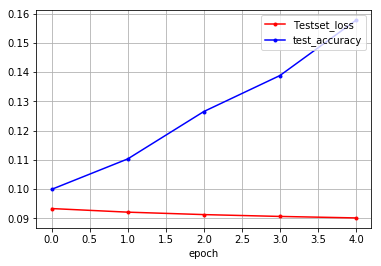

In [18]:
import matplotlib.pyplot as plt
import numpy
import sys
import os

# 결과 출력
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 테스트 셋의 정확도
y_vaccuracy = history.history['val_accuracy']

# 그래프로 표현
x_len = numpy.arange(len(y_vloss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_vaccuracy, marker='.', c="blue", label='test_accuracy')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.show()

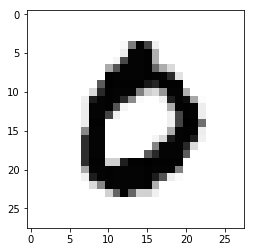

The Answer is  [5]


In [16]:
# test the model through visually debugging the inputs,,  run > twice to see the image
# index of your input to test
n = 3

# see the image by plotting
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')  
plt.show()

# your model's prediction, is the output correct?
print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28* 28) ) ) )


## 1. Report the result of the test loss & accuracy, when we set the dimension(neurons) of hidden layer to (64, 128, 256) with one hidden layer.
## *** Default condition : refer in the above codes.. 
## *** You have to write your codes in another blank area, and write your answer in below.

> 들여쓴 블록


| dimension |      test loss     |    test accuracy      |
|-----------|--------------------|-----------------------|
|   64      |                    |                       |
|-----------|--------------------|-----------------------|
|   128     |                    |                       | 
|-----------|--------------------|-----------------------|
|   256     |                    |                       |





In [31]:
# Write your answer in here
"""
dimension 64
test loss : 0.08976013565063476
test accuracy : 0.1843000054359436

dimension 128
Test loss: 0.08933562490940095
Test accuracy: 0.2102999985218048

dimension 256
Test loss: 0.08826014685630798
Test accuracy: 0.29429998993873596
"""


'\ndimension 64\ntest loss : 0.08976013565063476\ntest accuracy : 0.1843000054359436\n\ndimension 128\nTest loss: 0.08933562490940095\nTest accuracy: 0.2102999985218048\n\ndimension 256\nTest loss: 0.08826014685630798\nTest accuracy: 0.29429998993873596\n'

In [54]:
# set the dimension of hidden layer to 64
def make_model(num_layers):
    model= Sequential()
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = x_train.shape[1], activation='softmax'))
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(output_dim = 64, input_dim = x_train.shape[1], activation='sigmoid'))
        else:
            model.add(Dense(output_dim = 10, activation='sigmoid'))
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model

In [55]:
(x_train.shape[1],)
#num_hidden_neurons = 64
model = make_model(num_layers=1)

model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))

C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=64)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0914 - accuracy: 0.0989 - val_loss: 0.0910 - val_accuracy: 0.1018
Epoch 2/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.0907 - accuracy: 0.1095 - val_loss: 0.0905 - val_accuracy: 0.1267
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0903 - accuracy: 0.1368 - val_loss: 0.0901 - val_accuracy: 0.1560
Epoch 4/5
60000/60000 [=

In [56]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08955387477874756
Test accuracy: 0.20739999413490295


In [57]:
history.history

{'val_loss': [0.09098487620353699,
  0.0904933875322342,
  0.09013805607557297,
  0.08983437230587006,
  0.08955387580394746],
 'val_accuracy': [0.10180000215768814,
  0.1266999989748001,
  0.15600000321865082,
  0.18389999866485596,
  0.20739999413490295],
 'loss': [0.09142892117897669,
  0.09073150426944097,
  0.09031824016173681,
  0.08999223322868347,
  0.08970251265764237],
 'accuracy': [0.098916665, 0.109516665, 0.13676667, 0.16633333, 0.19188334]}

In [58]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 78us/step


[0.08955387477874756, 0.20739999413490295]

In [ ]:
import matplotlib.pyplot as plt
import numpy
import sys
import os

# 결과 출력
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 테스트 셋의 정확도
y_vaccuracy = history.history['val_accuracy']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_vaccuracy, marker='.', c="blue", label='test_accuracy')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.show()

In [24]:
# set the dimension of hidden layer to 128
def make_model(num_layers):
    model= Sequential()
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = x_train.shape[1], activation='softmax'))
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(output_dim = 128, input_dim = x_train.shape[1], activation='sigmoid'))
        else:
            model.add(Dense(output_dim = 10, activation='sigmoid'))
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model

In [25]:
(x_train.shape[1],)
#num_hidden_neurons = 128
model = make_model(num_layers=1)

model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=128)`
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.0930 - accuracy: 0.0732 - val_loss: 0.0921 - val_accuracy: 0.0761
Epoch 2/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.0916 - accuracy: 0.0803 - val_loss: 0.0911 - val_accuracy: 0.0923
Epoch 3/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.0907 - accuracy: 0.1077 - val_loss: 0.0904 - val_accuracy: 0.1473
Epoch 4/5
60000/60000 

In [26]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0892838091135025
Test accuracy: 0.22599999606609344


In [27]:
# set the dimension of hidden layer to 256
def make_model(num_layers):
    model= Sequential()
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = x_train.shape[1], activation='softmax'))
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(output_dim = 256, input_dim = x_train.shape[1], activation='sigmoid'))
        else:
            model.add(Dense(output_dim = 10, activation='sigmoid'))
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model

In [28]:
(x_train.shape[1],)
#num_hidden_neurons = 256
model = make_model(num_layers=1)

model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=256)`
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0913 - accuracy: 0.1386 - val_loss: 0.0904 - val_accuracy: 0.2080
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0900 - accuracy: 0.2391 - val_loss: 0.0896 - val_accuracy: 0.2625
Epoch 3/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0892 - accuracy: 0.2810 - val_loss: 0.0889 - val_accuracy: 0.3069
Epoch 4/5
60000/60000 

In [29]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08785697774887084
Test accuracy: 0.36570000648498535


## 2. Report the result of the test loss & accuracy, when we set the number of hidden layer to (2, 4, 8)  
## *** Default condition : refer in the above codes and each hidden layer have same neurons(number of neurons: 128) 
## *** You have to write your codes in another blank area, and write your answer in below.

> 들여쓴 블록


| layer's num |      test loss     |    test accuracy      |
|-------------|--------------------|-----------------------|
|   2         |                    |                       |
|-------------|--------------------|-----------------------|
|   4         |                    |                       | 
|-------------|--------------------|-----------------------|
|   8         |                    |                       |



In [0]:
# Write your answer in here 

"""
hidden layer = 2
Test loss: 0.09115856664180756
Test accuracy: 0.08919999748468399

hidden layer = 4
Test loss: 0.09257981966733933
Test accuracy: 0.09740000218153

hidden layer = 8
Test loss: 0.09131976207494735
Test accuracy: 0.10100000351667404
"""


In [30]:
#num_hidden_neurons = 128
def make_model(num_layers):
    model= Sequential()
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = x_train.shape[1], activation='softmax'))
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(output_dim = 128, input_dim = x_train.shape[1], activation='sigmoid'))
        else:
            model.add(Dense(output_dim = 10, activation='sigmoid'))
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model

In [31]:
# number of hidden 'layers' = 2
(x_train.shape[1],)
#num_hidden_neurons = 128
model = make_model(num_layers=2)

model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=128)`
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  del sys.path[0]
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 101,880
Trainable params: 101,880
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0923 - accuracy: 0.0904 - val_loss: 0.0921 - val_accuracy: 0.0892
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.0919 - accuracy: 0.0904 - val_loss: 0.0918 - val_accuracy: 0.0892
Epoch 3/5
60000/60000 [=============

In [32]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09115856664180756
Test accuracy: 0.08919999748468399


In [33]:
# number of hidden 'layers' = 4
(x_train.shape[1],)
#num_hidden_neurons = 128
model = make_model(num_layers=4)

model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=128)`
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  del sys.path[0]
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
Total params: 102,100
Trainable params: 102,100
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 17us

In [34]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09257981966733933
Test accuracy: 0.09740000218153


In [35]:
# number of hidden 'layers' = 8
(x_train.shape[1],)
#num_hidden_neurons = 128
model = make_model(num_layers=8)

model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=128)`
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  del sys.path[0]
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [36]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09131976207494735
Test accuracy: 0.10100000351667404


## 3. Report the result of the test loss & accuracy, when we set the number of batch size to (64, 128, 256) 
## *** Default condition : refer in the above codes,  use "relu" activation, dropout rate(0.2) and each hidden layer have same neurons(number of neurons: 256) 
## ***  Adjust 8 Layer(number of hidden layer) 
## *** You have to write your codes in another blank area, and write your answer in below.

> 들여쓴 블록


| batch size  |      test loss     |    test accuracy      |
|-------------|--------------------|-----------------------|
|   64        |                    |                       |
|-------------|--------------------|-----------------------|
|   128       |                    |                       | 
|-------------|--------------------|-----------------------|
|   256       |                    |                       |



In [0]:
# Write your answer in here
"""
batch size 64
Test loss: 0.08964685876369477
Test accuracy: 0.23109999299049377

batch size 128
Test loss: 0.08987517845630645
Test accuracy: 0.11079999804496765

batch size 256
Test loss: 0.08996683235168457
Test accuracy: 0.13760000467300415
"""


In [37]:
x_train.shape[1]

784

In [60]:
def make_model(num_layers):
    model= Sequential()
    
    # 입력층
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = 784, activation='relu'))
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    # 은닉층 : 256개의 노드, 활성화함수는 relu
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(output_dim = 256, input_dim = 784, activation='relu'))
        else:
            model.add(Dense(output_dim = 256, activation='relu'))
    
    # 드랍아웃 층
    model.add(Dropout(0.2))
    
    # 출력층 : 활성화함수는 softmax(다중분류이므로)
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model

In [61]:
# batch_size = 64

# number of hidden 'layers' = 8
(x_train.shape[1],)

#num_hidden_neurons = 256
model = make_model(num_layers=8)

# batch size = 64
model.summary()
history = model.fit(x_train, y_train, batch_size = 64, epochs = 5, validation_data  =(x_test, y_test))

C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=256)`
  del sys.path[0]
C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  from ipykernel import kernelapp as app
C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_19 (Dense)             (None, 256)              

In [62]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08948207092285156
Test accuracy: 0.30820000171661377


In [63]:
# batch_size = 128

# number of hidden 'layers' = 8
(x_train.shape[1],)

#num_hidden_neurons = 256
model = make_model(num_layers=8)

# batch size = 128
model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))

C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=256)`
  del sys.path[0]
C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  from ipykernel import kernelapp as app
C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_28 (Dense)             (None, 256)              

In [64]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0898047513961792
Test accuracy: 0.10639999806880951


In [65]:
# batch_size = 256

# number of hidden 'layers' = 8
(x_train.shape[1],)

#num_hidden_neurons = 256
model = make_model(num_layers=8)

# batch size = 256
model.summary()
history = model.fit(x_train, y_train, batch_size = 256, epochs = 5, validation_data  =(x_test, y_test))

C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=256)`
  del sys.path[0]
C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  from ipykernel import kernelapp as app
C:\Users\runia\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_34 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_35 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_36 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_37 (Dense)             (None, 256)              

In [66]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08995620033740998
Test accuracy: 0.13459999859333038
